<p style="color:white; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">Christophe Schlick</span>
<span style="width:49%; display:inline-block; text-align:right">schlick[at]u-bordeaux.fr</span>
<span style="font-size:40px; font-style:normal"><b>GENERATION DE TRACÉS</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">Version 2023-01</span>
<span style="width:49%; display:inline-block; text-align:right">Licence CC-BY-NC-ND</span></p>

L'objectif de cette feuille d'exercices est d'illustrer le principe de ***génération de tracés par algorithmes***. Dans le vocabulaire lié à l'imagerie numérique, un **tracé** est une image créée par un ensemble de commandes graphiques permettant de décrire une image par le biais d'un langage de description.
On ne va donc pas définir l'image pixel par pixel (comme on l'a fait dans la feuille d'exercices A) mais fournir des informations de plus haut niveau permettant à un interpréteur de construire l'image en fonction de la liste des commandes. Pour ce type de construction, on utilise également le terme d'***image vectorielle*** par opposition à ***image matricielle*** (= la grille de pixels), mais le terme **tracé** (**draw** en anglais) s'impose de plus en plus, depuis quelques années.

L'ensemble des exercices vont mettre en oeuvre l'utilisation du langage Python pour générer ces tracés via l'écriture de code au format **SVG** (***Scalable Vector Graphics***). Nous verrons les éléments nécessaires du format **SVG** au fur et à mesure des exercices, mais un petit détour par un [**tutoriel SVG**](https://developer.mozilla.org/fr/docs/Web/SVG/Tutorial) qui détaille plus longuement les notions abordées peut s'avérer très utile.

---
Dans le notebook **03-IPython.ipynb**, nous avons vu le principe qui sera mis en oeuvre dans cette feuille d'exercices :

- On crée une chaîne de caractères multi-lignes contenant le code SVG du tracé à construire
- On affiche le tracé correspondant via la fonction **`dp.SVG`** du module **`IPython.display`**

Voici un rappel de l'exemple SVG présenté dans le notebook sur IPython :

In [1]:
import numpy as np # import du package 'numpy' avec alias 'np'
import IPython.display as dp # import du package 'Ipython.display' avec alias 'dp'

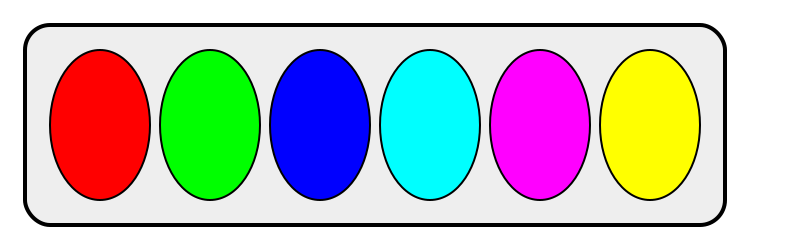

In [2]:
# On crée une chaîne de caractères multi-lignes contenant du code SVG
code = r"""
<svg viewBox='0 0 800 240' xmlns='http://www.w3.org/2000/svg'>
  <g fill='#EEE' stroke='#000' stroke-width='2'>
    <rect x='25' y='25' width='700' height='200' rx='25' stroke-width='4'/>
    <ellipse cx='100' cy='125' rx='50' ry='75' fill='#F00'/>
    <ellipse cx='210' cy='125' rx='50' ry='75' fill='#0F0'/>
    <ellipse cx='320' cy='125' rx='50' ry='75' fill='#00F'/>
    <ellipse cx='430' cy='125' rx='50' ry='75' fill='#0FF'/>
    <ellipse cx='540' cy='125' rx='50' ry='75' fill='#F0F'/>
    <ellipse cx='650' cy='125' rx='50' ry='75' fill='#FF0'/>
  </g>
</svg>
"""
dp.SVG(code) # on affiche le tracé correspondant au code SVG via la fonction 'dp.SVG'

Le code précédent est appelé **code SVG statique**, c'est-à-dire que les commandes SVG sont écrites avec des paramètres fixes et sont insérées dans une chaîne de caractère Python. Ce mécanisme fonctionne, mais  n'offre pas une grande flexibilité. Dans cette feuille d'exercices, nous allons au contraire générer du **code SVG dynamique** à l'aide de fonctions Python qui vont construire des commandes SVG en fonction des paramètres passés par l'utilisateur. Le principe général consiste générer chaque commande SVG sous forme de chaînes de caractères et à les stocker dans une liste qui sera fusionnée puis insérée entre les balises **`<svg>`** et **`</svg>`** :


<svg viewBox='0 0 640 320' width='640' xmlns='http://www.w3.org/2000/svg'>
  <rect x='0' y='0' width='640' height='320' fill='#000'/>
  <rect x='20' y='20' width='600' height='280' fill='#FFF'/>
  <circle cx='120' cy='160' r='60' fill='#F00' stroke='#000' stroke-width='1'/>
  <ellipse cx='320' cy='160' rx='100' ry='120' fill='#0F0' stroke='#000' stroke-width='1'/>
  <circle cx='520' cy='160' r='60' fill='#00F' stroke='#000' stroke-width='1'/>
</svg>



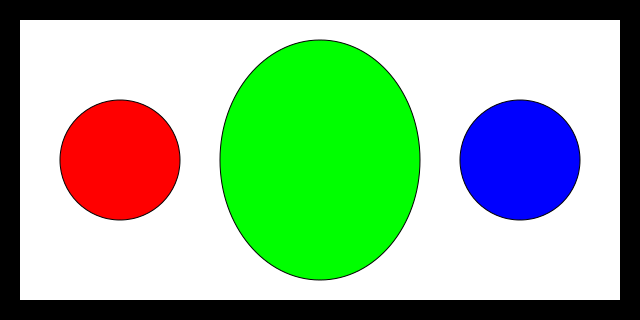

In [3]:
# fonction d'encapsulation de code SVG
svg = lambda code: f"""
<svg viewBox='0 0 640 320' width='640' xmlns='http://www.w3.org/2000/svg'>{''.join(code)}\n</svg>\n"""

# fonction de tracé de rectangle avec remplissage de couleur uniforme
rect = lambda x, y, w, h, fill: f"""
  <rect x='{x}' y='{y}' width='{w}' height='{h}' fill='{fill}'/>"""

# fonction de tracé de disque avec bordure noire et remplissage de couleur uniforme
disk = lambda x, y, r, fill: f"""
  <circle cx='{x}' cy='{y}' r='{r}' fill='{fill}' stroke='#000' stroke-width='1'/>"""

# fonction de tracé d'ellipse avec bordure noire et remplissage de couleur uniforme
oval = lambda x, y, rx, ry, fill: f"""
  <ellipse cx='{x}' cy='{y}' rx='{rx}' ry='{ry}' fill='{fill}' stroke='#000' stroke-width='1'/>"""

code = [ # le code est défini par une liste d'appels de fonctions, chacune retournant du code SVG
  rect(0, 0, 640, 320, '#000'), rect(20, 20, 600, 280, '#FFF'),
  disk(120, 160, 60, '#F00'), oval(320, 160, 100, 120, '#0F0'), disk(520, 160, 60, '#00F')
]

print(svg(code)) # affichage du code SVG généré
#with open('test.svg','w') as file: print(svg(code), file=file) # sauvegarde du code dans un fichier SVG
dp.SVG(svg(code)) # affichage du tracé au format SVG

<h2 style="padding:16px; color:white; background:#07D">Exercice B1 - Utilisation des formes de base</h2>

Ecrire les instructions Python/SVG permettant de générer les 12 images de la figure ci-dessous. Chaque image individuelle devra utiliser la balise SVG suivante, pour obtenir un tracé initial de taille 240 sur 240 (mais évidemment, comme c'est un tracé, on pourra le redimensionner de manière arbitraire) :

**```<svg viewBox='0 0 240 240' width='240' xmlns='http://www.w3.org/2000/svg'>```**

Vous aurez besoin des balises SVG suivantes :

- **`<rect x=... y=... width=... height=... fill=... />`**
- **`<circle cx=... cy=... r=... fill=... />`**
- **`<ellipse cx=... cy=... rx=... ry=... fill=... />`**

![](IMG/shapes.png 'shapes.png')

In [12]:
W, H = 240, 240 # définition de la taille de l'image à générer

# fonction d'encapsulation de code SVG (utilisant les variables globales W et H)
svg = lambda code: f"""
<svg viewBox='0 0 {W} {H}' width='{W}' xmlns='http://www.w3.org/2000/svg'>{''.join(code)}\n</svg>\n"""

KW = '#000 #FFF'.split() # palette binaire (noir et blanc au format '#RGB')
RGBCMY = '#F00 #0F0 #00F #0FF #F0F #FF0'.split() # palette de 6 couleurs (RGBCMY)

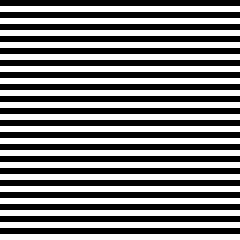

In [13]:
def stripes(rows, width, height, fills):
  """generate horizontal stripes with alternating filling colors"""
  h, n = height/rows, len(fills)
  return [rect(0, r*h, width, h, fills[r%n]) for r in range(rows)]

code = stripes(40, W, H, KW) # 40 lignes horizontales, alternance noir et blanc
#code = stripes(40, W, H, RGBCMY) # 40 lignes horizontales, alternance RGBCMY

def tiles(cols, rows, width, height, fills):
  """generate rectangular tiles with alternating filling colors"""
  w, h, n = width/cols, height/rows, len(fills)
  return [rect(c*w, r*h, w, h, fills[(r+c)%n]) for r in range(rows) for c in range(cols)]

#code = tiles(8, 8, W, H, KW)
#code = tiles(8, 8, W, H, RGBCMY)

def boxes(steps, width, height, fills):
  """generate concentric boxes with alternating filling colors"""
  w, h, n = width/(2*steps-1), height/(2*steps-1), len(fills)
  return [rect(s*w, s*h, width-2*s*w, height-2*s*h, fills[s%n]) for s in range(steps)]

#code = boxes(8, W, H, KW)
#code = boxes(8, W, H, RGBCMY)

#print(svg(code)) # enlever le commentaire pour voir le code SVG généré
dp.SVG(svg(code)) # affichage du tracé au format SVG

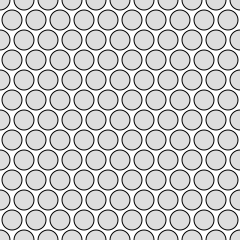

In [5]:
def quincunx(cols, rows, width, height, fills, pad=2):
  """generate a quincunx pattern of disks with alternating filling colors"""
  w, h, n = width/cols, height/rows, len(fills)
  radius = 0.5*w - pad # on réduit le rayon du disque par la marge souhaitée
  # on construit les lignes paires, puis les lignes impaires avec décalage (0.5*w, 0.5*h)
  code  = [disk(w*c, h*r, radius, fills[c%n]) for c in range(1+cols) for r in range(1+rows)]
  code += [disk(w*(0.5+c), h*(0.5+r), radius, fills[(c-1)%n]) for c in range(cols) for r in range(rows)]
  return code

code = quincunx(10, 6, W, H, ['#DDD'])
#code = quincunx(10, 6, W, H, RGBCMY[:3])
#code = quincunx(10, 6, W, H, RGBCMY[-3:], 0)

#print(svg(code)) # enlever le commentaire pour voir le code SVG généré
dp.SVG(svg(code)) # affichage du tracé au format SVG

In [ ]:
def spiral(steps, width, height, fills):
  """create a spiral pattern of disks with alternating filling colors"""
  # TODO
  return []

code = spiral(300, W, H, ['#DDD'])
#code = spiral(300, W, H, KW)
#code = spiral(300, W, H, RGBCMY)

#print(svg(code)) # enlever le commentaire pour voir le code SVG généré
dp.SVG(svg(code)) # affichage du tracé au format SVG

In [ ]:
def splats(steps, minscale, maxscale, width, height, fills):
  """generate elliptical splats with random positions/sizes/fills"""
  # TODO
  return []

code = splats(500, 0.03, 0.03, W, H, ['#DDD'])
#code = splats(200, 0.03, 0.12, W, H, RGBCMY)

#print(svg(code)) # enlever le commentaire pour voir le code SVG généré
dp.SVG(svg(code)) # affichage du tracé au format SVG

<h2 style="padding:16px; color:white; background:#07D">Exercice B2 - Génération de dégradés et de motifs</h2>

A suivre...

In [ ]:
# TODO

<h2 style="padding:16px; color:white; background:#07D">Exercice B3 - Pixel Art</h2>

A suivre...

---